In [ ]:
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/emg_myopathy.dat"
data = np.fromfile(file_path, dtype = np.float32)

total_data_points = len(data)

print("Total Data Points:", total_data_points)

Total Data Points: 55168


In [ ]:
data = np.nan_to_num(data)
data = np.nan_to_num(data, posinf=0, neginf=0)
data += 1e-8

<function matplotlib.pyplot.show(close=None, block=None)>

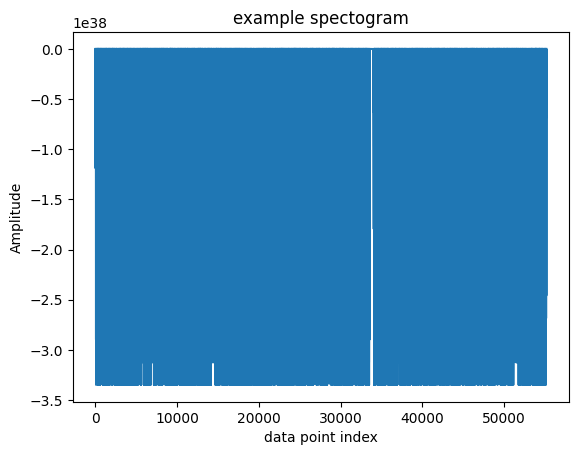

In [ ]:
plt.plot(data)
plt.title("example spectogram")
plt.xlabel("data point index")
plt.ylabel("Amplitude")
plt.show

In [ ]:
import pandas as pd
df = pd.DataFrame(data)
print(df.head())

              0
0  1.000000e-08
1  1.000000e-08
2  1.000000e-08
3  1.000000e-08
4  1.000000e-08


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Assuming dat_file_path contains the path to your .dat file
dat_file_path = "/content/emg_myopathy.dat"

# Load your data into 'data'
data = np.fromfile(dat_file_path, dtype=np.float32)

# Assuming 'labels_binary' is a pandas Series with binary labels
threshold = 0
labels_binary = (data > threshold).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels_binary, test_size=0.2, random_state=42)

# # Print shapes for debugging
# print("X_train shape:", X_train.shape)
# print("X_test shape:", X_test.shape)
# print("y_train shape:", y_train.shape)
# print("y_test shape:", y_test.shape)

# Reshape the data for CNN input
num_time_steps = 1  # Number of time steps (assuming each data point is a time step)
num_features = 1  # Number of features

X_train = X_train.reshape((X_train.shape[0], num_time_steps, num_features))
X_test = X_test.reshape((X_test.shape[0], num_time_steps, num_features))

# Print the new shapes for verification
print("X_train shape after reshaping:", X_train.shape)
print("X_test shape after reshaping:", X_test.shape)

from tensorflow.keras.layers import ZeroPadding1D

model = Sequential([
    ZeroPadding1D(padding=1, input_shape=(num_time_steps, num_features)),
    Conv1D(32, kernel_size=3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


X_train shape after reshaping: (44134, 1, 1)
X_test shape after reshaping: (11034, 1, 1)
Epoch 1/10
1380/1380 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.5431 - val_loss: nan - val_accuracy: 0.5410
Epoch 2/10
1380/1380 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.5431 - val_loss: nan - val_accuracy: 0.5410
Epoch 3/10
1380/1380 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.5431 - val_loss: nan - val_accuracy: 0.5410
Epoch 4/10
1380/1380 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.5431 - val_loss: nan - val_accuracy: 0.5410
Epoch 5/10
1380/1380 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.5431 - val_loss: nan - val_accuracy: 0.5410
Epoch 6/10
1380/1380 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.5431 - val_loss: nan - val_accuracy: 0.5410
Epoch 7/10
1380/1380 [==============================] - 3s 2ms/step - loss: nan - a

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding1d (ZeroPaddin  (None, 3, 1)              0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 1, 32)             128       
                                                                 
 flatten_12 (Flatten)        (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 33        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
